In [1]:
import torch
from torch import nn
from d2l import torch as d2l
import numpy as np
from matplotlib import pyplot as plt


In [2]:
x=torch.arange(-8.0,8.0,0.1,requires_grad=True)
y=torch.sigmoid(x)
y.sum().backward()

print(y*(1-y))
print(x.grad)

tensor([0.0003, 0.0004, 0.0004, 0.0005, 0.0005, 0.0006, 0.0006, 0.0007, 0.0007,
        0.0008, 0.0009, 0.0010, 0.0011, 0.0012, 0.0014, 0.0015, 0.0017, 0.0018,
        0.0020, 0.0022, 0.0025, 0.0027, 0.0030, 0.0033, 0.0037, 0.0041, 0.0045,
        0.0049, 0.0055, 0.0060, 0.0066, 0.0073, 0.0081, 0.0089, 0.0099, 0.0109,
        0.0120, 0.0132, 0.0146, 0.0160, 0.0177, 0.0194, 0.0214, 0.0235, 0.0259,
        0.0285, 0.0313, 0.0343, 0.0376, 0.0412, 0.0452, 0.0494, 0.0540, 0.0590,
        0.0644, 0.0701, 0.0763, 0.0828, 0.0898, 0.0972, 0.1050, 0.1132, 0.1217,
        0.1306, 0.1398, 0.1491, 0.1587, 0.1683, 0.1779, 0.1874, 0.1966, 0.2055,
        0.2139, 0.2217, 0.2288, 0.2350, 0.2403, 0.2445, 0.2475, 0.2494, 0.2500,
        0.2494, 0.2475, 0.2445, 0.2403, 0.2350, 0.2288, 0.2217, 0.2139, 0.2055,
        0.1966, 0.1874, 0.1779, 0.1683, 0.1587, 0.1491, 0.1398, 0.1306, 0.1217,
        0.1132, 0.1050, 0.0972, 0.0898, 0.0828, 0.0763, 0.0701, 0.0644, 0.0590,
        0.0540, 0.0494, 0.0452, 0.0412, 

In [3]:
def relu(x):
    a=torch.zeros_like(x)
    return torch.max(a,x)

In [4]:
class MLP(d2l.Classifier):
    def __init__(self,num_inputs,num_outputs,num_hiddens,lr,sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.w1=nn.Parameter(torch.randn(num_inputs,num_hiddens)*sigma)
        self.b1=nn.Parameter(torch.zeros(num_hiddens))
        self.w2=nn.Parameter(torch.randn(num_hiddens,num_outputs)*sigma)
        self.b2=nn.Parameter(torch.zeros(num_outputs))

    def forward(self,x):
        x=x.reshape((-1,self.num_inputs))#注意reshape要传元组
        h=relu(x@self.w1+self.b1)
        return h@self.w2+self.b2


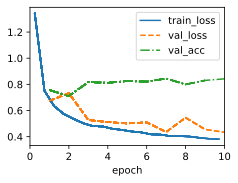

In [5]:
model=MLP(num_inputs=784,num_outputs=10,num_hiddens=256,lr=0.1)
data=d2l.FashionMNIST(batch_size=256)
#print(data.train)
trainer=d2l.Trainer(max_epochs=10)
trainer.fit(model,data)

In [6]:
def dropout(x,drop_out):
    assert 0<=drop_out<=1
    if drop_out==1:
        return torch.zeros_like(x)
    mask=(torch.randn(x.shape)>drop_out).float()
    return mask*x/(1.0-drop_out)

In [7]:
class DropoutMLPScratch(d2l.Classifier):
    def __init__(self,num_outputs,num_hiddens_1,num_hiddens_2,dropout_1, dropout_2,lr):
        super().__init__()
        self.save_hyperparameters()
        self.lin1=nn.LazyLinear(num_hiddens_1)
        self.lin2=nn.LazyLinear(num_hiddens_2)
        self.lin3=nn.LazyLinear(num_outputs)
        self.relu=nn.ReLU()
    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((X.shape[0], -1))))
        if self.training:
            H1=dropout(H1, self.dropout_1)
        H2= self.relu(self.lin2(H1))
        if self.training:
            H2=dropout(H2, self.dropout_2)
        return self.lin3(H2)

None


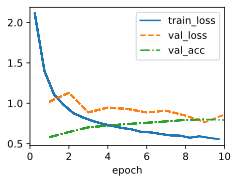

In [8]:
hparams = {'num_outputs':10, 'num_hiddens_1':256, 'num_hiddens_2':256,
'dropout_1':0.5, 'dropout_2':0.5, 'lr':0.1}
model=DropoutMLPScratch(**hparams)
data=d2l.FashionMNIST(batch_size=256)
trainer=d2l.Trainer(max_epochs=10)
mylist=trainer.fit(model, data)
print(mylist)

In [9]:

hparams = {'num_outputs':10, 'num_hiddens_1':256, 'num_hiddens_2':256,
'dropout_1':0.5, 'dropout_2':0.5, 'lr':0.1}
data=d2l.FashionMNIST(batch_size=256)
class MLP(d2l.Classifier):
    def __init__(self,num_outputs,num_hiddens1,num_hiddens2,dropout1, dropout2,lr):
        super().__init__()
        self.save_hyperparameters()
        self.lin1=nn.LazyLinear(num_hiddens1)
        self.lin2=nn.LazyLinear(num_hiddens2)
        self.lin3=nn.LazyLinear(num_outputs)
        self.relu=nn.ReLU()
        self.h1_var= []
        self.h2_var=[]
        self.dropout1=dropout1
        self.dropout2=dropout2
    def forward(self,X):
        X_flat=X.reshape((X.shape[0], -1))
        H1= self.relu(self.lin1(X_flat))
        if self.training:
            H1=dropout(H1, self.dropout1)
        H2=self.relu(self.lin2(H1))
        if self.training:
            H2=dropout(H2, self.dropout2)
        return self.lin3(H2)


def train(model_class, data_iter, num_epochs, lr,dropout1,dropout2):
    model = model_class(hparams['num_outputs'], hparams['num_hiddens_1'], hparams['num_hiddens_2'],dropout1,dropout2,hparams['lr'])
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss(reduction='none')

    h1_variances_per_epoch = []
    h2_variances_per_epoch = []

    for epoch in range(num_epochs):
        model.train() # 确保是训练模式，以便应用dropout
        h1_batch_vars = []
        h2_batch_vars = []

        for X, y in data_iter.train_dataloader():
            optimizer.zero_grad()

            X_flat = X.reshape((X.shape[0], -1))
            H1_pre_dropout = model.relu(model.lin1(X_flat))
            H1_processed = dropout(H1_pre_dropout, model.dropout1) # 模拟dropout
            
            H2_pre_dropout = model.relu(model.lin2(H1_processed))
            H2_processed = dropout(H2_pre_dropout, model.dropout2) # 模拟dropout
            
            y_hat = model.lin3(H2_processed)
            
            l = loss_fn(y_hat, y).sum()
            l.backward()
            optimizer.step()

            # 计算当前批次的激活值方差
            # 使用 .detach() 避免计算图上的副作用
            # .item() 用于将单个张量值转换为Python数字
            if H1_processed.numel() > 1: # 确保有足够元素计算方差
                h1_batch_vars.append(torch.var(H1_processed.detach()).item())
            if H2_processed.numel() > 1:
                h2_batch_vars.append(torch.var(H2_processed.detach()).item())
        
        # 计算当前epoch的平均方差
        if h1_batch_vars:
            h1_variances_per_epoch.append(np.mean(h1_batch_vars))
        else:
            h1_variances_per_epoch.append(0) 
        
        if h2_batch_vars:
            h2_variances_per_epoch.append(np.mean(h2_batch_vars))
        else:
            h2_variances_per_epoch.append(0) 
        if (epoch + 1) % 5 == 0 or epoch == num_epochs - 1:
            print(f"Epoch {epoch+1}/{num_epochs}: H1 Var = {h1_variances_per_epoch[-1]:.4f}, H2 Var = {h2_variances_per_epoch[-1]:.4f}")

    return h1_variances_per_epoch, h2_variances_per_epoch

num_epochs=10 
h1_var_no_dropout, h2_var_no_dropout = train(MLP, data, num_epochs, hparams['lr'], 0.0, 0.0)
h1_var_with_dropout, h2_var_with_dropout = train(MLP, data, num_epochs,hparams['lr'], 0.2, 0.5)


KeyboardInterrupt: 

In [ ]:

# 绘制方差随时间变化的图
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), h1_var_no_dropout, label='H1 Var (No Dropout)', color='blue')
plt.plot(range(1, num_epochs+1), h1_var_with_dropout, label='H1 Var (With Dropout)', color='red')
plt.title('Hidden Layer 1 Activation Variance over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Variance')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs_variance_track + 1), h2_var_no_dropout, label='H2 Var (No Dropout)', color='blue')
plt.plot(range(1, num_epochs_variance_track + 1), h2_var_with_dropout, label='H2 Var (With Dropout)', color='red')
plt.title('Hidden Layer 2 Activation Variance over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Variance')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [12]:
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt
import numpy as np

class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens1, num_hiddens2, dropout1, dropout2, lr, wd):
        super().__init__()
        self.save_hyperparameters()
        self.lin1 = nn.LazyLinear(num_hiddens1)
        self.lin2 = nn.LazyLinear(num_hiddens2)
        self.lin3 = nn.LazyLinear(num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        X_flat = X.reshape((X.shape[0], -1))
        H1 = self.relu(self.lin1(X_flat))
        if self.training:
            H1 = dropout(H1, self.dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training:
            H2 = dropout(H2, self.dropout2)
        return self.lin3(H2)

    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), lr=self.lr, weight_decay=self.wd)

    # --- 新增的关键方法 ---
    def validation_step(self, batch):
        """
        重写验证步骤，确保返回批次准确率。
        这个方法会被d2l.Trainer在验证循环中自动调用。
        """
        # self(batch[0]) 会调用forward方法得到预测值 y_hat
        # batch[1] 是真实标签 y
        # self.accuracy() 是从d2l.Classifier继承的辅助函数
        return self.accuracy(self(batch[0]), batch[1])

AttributeError: 'Trainer' object has no attribute 'val_acc_list'

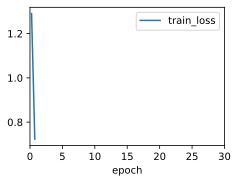

In [13]:
hparams = {
    'num_outputs': 10, 
    'num_hiddens_1': 256, 
    'num_hiddens_2': 256,
    'lr': 0.1,
    'num_epochs': 30
}
dropout_params = {'dropout1': 0.2, 'dropout2': 0.5}
wd_param = 0.01
data = d2l.FashionMNIST(batch_size=256)
histories = {}

# --- 运行四个场景的实验 (已修正) ---

# 场景一: 无正则化
print("--- 运行场景1: 无正则化 ---")
model_no_reg = MLP(num_outputs=hparams['num_outputs'], 
                   num_hiddens1=hparams['num_hiddens_1'], 
                   num_hiddens2=hparams['num_hiddens_2'],
                   dropout1=0.0, dropout2=0.0, lr=hparams['lr'],
                   wd=0.0) # 在模型初始化时传入wd=0.0
trainer_no_reg = d2l.Trainer(max_epochs=hparams['num_epochs'], num_gpus=0)
# fit()调用不再需要wd参数
histories['No Regularization'] = trainer_no_reg.fit(model_no_reg, data)

# 场景二: 仅使用Dropout
print("\n--- 运行场景2: 仅使用Dropout ---")
model_dropout = MLP(num_outputs=hparams['num_outputs'], 
                    num_hiddens1=hparams['num_hiddens_1'], 
                    num_hiddens2=hparams['num_hiddens_2'],
                    dropout1=dropout_params['dropout1'], 
                    dropout2=dropout_params['dropout2'], 
                    lr=hparams['lr'],
                    wd=0.0) # 在模型初始化时传入wd=0.0
trainer_dropout = d2l.Trainer(max_epochs=hparams['num_epochs'], num_gpus=0)
histories['Dropout Only'] = trainer_dropout.fit(model_dropout, data)

# 场景三: 仅使用权重衰减
print("\n--- 运行场景3: 仅使用权重衰减 ---")
model_wd = MLP(num_outputs=hparams['num_outputs'], 
               num_hiddens1=hparams['num_hiddens_1'], 
               num_hiddens2=hparams['num_hiddens_2'],
               dropout1=0.0, dropout2=0.0, lr=hparams['lr'],
               wd=wd_param) # 在模型初始化时传入wd
trainer_wd = d2l.Trainer(max_epochs=hparams['num_epochs'], num_gpus=0)
histories['Weight Decay Only'] = trainer_wd.fit(model_wd, data)

# 场景四: 同时使用Dropout和权重衰减
print("\n--- 运行场景4: 同时使用Dropout和权重衰减 ---")
model_both = MLP(num_outputs=hparams['num_outputs'], 
                 num_hiddens1=hparams['num_hiddens_1'], 
                 num_hiddens2=hparams['num_hiddens_2'],
                 dropout1=dropout_params['dropout1'], 
                 dropout2=dropout_params['dropout2'], 
                 lr=hparams['lr'],
                 wd=wd_param) # 在模型初始化时传入wd
trainer_both = d2l.Trainer(max_epochs=hparams['num_epochs'], num_gpus=0)
histories['Dropout + Weight Decay'] = trainer_both.fit(model_both, data)

# --- 结果可视化与分析 (这部分代码无需修改) ---
def plot_experiment_results(histories):
    plt.figure(figsize=(12, 10))
    colors = {'No Regularization': 'gray', 'Dropout Only': 'blue', 'Weight Decay Only': 'green', 'Dropout + Weight Decay': 'red'}
    linestyles = {'No Regularization': ':', 'Dropout Only': '--', 'Weight Decay Only': '-.', 'Dropout + Weight Decay': '-'}

    ax1 = plt.subplot(2, 1, 1)
    for name, history in histories.items():
        val_acc = [m[1] for m in history.metrics]
        ax1.plot(np.arange(1, len(val_acc) + 1), val_acc, 
                 label=name, color=colors[name], linestyle=linestyles[name])
    ax1.set_title('Validation Accuracy vs. Epochs')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Validation Accuracy')
    ax1.legend()
    ax1.grid(True)

    ax2 = plt.subplot(2, 1, 2)
    for name, history in histories.items():
        train_loss = [m[2] for m in history.metrics]
        ax2.plot(np.arange(1, len(train_loss) + 1), train_loss, 
                 label=name, color=colors[name], linestyle=linestyles[name])
    ax2.set_title('Training Loss vs. Epochs')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Training Loss')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_experiment_results(histories)

print("\n--- 最终验证准确率比较 ---")
for name, history in histories.items():
    final_val_acc = history.metrics[-1][1]
    print(f"{name:<25}: {final_val_acc:.4f}")

AttributeError: 'Trainer' object has no attribute 'val_acc_list'

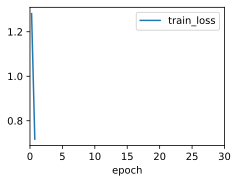

In [14]:
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt
import numpy as np

# Dropout函数
def dropout(X, dropout_prob):
    assert 0 <= dropout_prob <= 1
    if dropout_prob == 1: return torch.zeros_like(X)
    if dropout_prob == 0: return X
    mask = (torch.rand(X.shape) > dropout_prob).float()
    return mask * X / (1.0 - dropout_prob)

# 修正后的MLP类 (包含了configure_optimizers和validation_step)
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens1, num_hiddens2, dropout1, dropout2, lr, wd):
        super().__init__()
        self.save_hyperparameters()
        self.lin1 = nn.LazyLinear(num_hiddens1)
        self.lin2 = nn.LazyLinear(num_hiddens2)
        self.lin3 = nn.LazyLinear(num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        X_flat = X.reshape((X.shape[0], -1))
        H1 = self.relu(self.lin1(X_flat))
        if self.training:
            H1 = dropout(H1, self.dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training:
            H2 = dropout(H2, self.dropout2)
        return self.lin3(H2)

    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), lr=self.lr, weight_decay=self.wd)

    def validation_step(self, batch):
        return self.accuracy(self(batch[0]), batch[1])

# 实验设置
hparams = {
    'num_outputs': 10, 
    'num_hiddens_1': 256, 
    'num_hiddens_2': 256,
    'lr': 0.1,
    'num_epochs': 30
}
dropout_params = {'dropout1': 0.2, 'dropout2': 0.5}
wd_param = 0.01
data = d2l.FashionMNIST(batch_size=256)
histories = {} # 用于存储每个场景的训练历史记录对象

# 运行四个场景的实验
# --- 场景一: 无正则化 ---
print("--- 运行场景1: 无正则化 ---")
model_no_reg = MLP(num_outputs=hparams['num_outputs'], num_hiddens1=hparams['num_hiddens_1'], num_hiddens2=hparams['num_hiddens_2'], dropout1=0.0, dropout2=0.0, lr=hparams['lr'], wd=0.0)
trainer_no_reg = d2l.Trainer(max_epochs=hparams['num_epochs'], num_gpus=0)
histories['No Regularization'] = trainer_no_reg.fit(model_no_reg, data)

# --- 场景二: 仅使用Dropout ---
print("\n--- 运行场景2: 仅使用Dropout ---")
model_dropout = MLP(num_outputs=hparams['num_outputs'], num_hiddens1=hparams['num_hiddens_1'], num_hiddens2=hparams['num_hiddens_2'], dropout1=dropout_params['dropout1'], dropout2=dropout_params['dropout2'], lr=hparams['lr'], wd=0.0)
trainer_dropout = d2l.Trainer(max_epochs=hparams['num_epochs'], num_gpus=0)
histories['Dropout Only'] = trainer_dropout.fit(model_dropout, data)

# --- 场景三: 仅使用权重衰减 ---
print("\n--- 运行场景3: 仅使用权重衰减 ---")
model_wd = MLP(num_outputs=hparams['num_outputs'], num_hiddens1=hparams['num_hiddens_1'], num_hiddens2=hparams['num_hiddens_2'], dropout1=0.0, dropout2=0.0, lr=hparams['lr'], wd=wd_param)
trainer_wd = d2l.Trainer(max_epochs=hparams['num_epochs'], num_gpus=0)
histories['Weight Decay Only'] = trainer_wd.fit(model_wd, data)

# --- 场景四: 同时使用Dropout和权重衰减 ---
print("\n--- 运行场景4: 同时使用Dropout和权重衰减 ---")
model_both = MLP(num_outputs=hparams['num_outputs'], num_hiddens1=hparams['num_hiddens_1'], num_hiddens2=hparams['num_hiddens_2'], dropout1=dropout_params['dropout1'], dropout2=dropout_params['dropout2'], lr=hparams['lr'], wd=wd_param)
trainer_both = d2l.Trainer(max_epochs=hparams['num_epochs'], num_gpus=0)
histories['Dropout + Weight Decay'] = trainer_both.fit(model_both, data)

# 结果可视化与分析
def plot_experiment_results(histories):
    plt.figure(figsize=(12, 10))
    colors = {'No Regularization': 'gray', 'Dropout Only': 'blue', 'Weight Decay Only': 'green', 'Dropout + Weight Decay': 'red'}
    linestyles = {'No Regularization': ':', 'Dropout Only': '--', 'Weight Decay Only': '-.', 'Dropout + Weight Decay': '-'}

    ax1 = plt.subplot(2, 1, 1)
    for name, history in histories.items():
        val_acc = [m[1] for m in history.metrics]
        ax1.plot(np.arange(1, len(val_acc) + 1), val_acc, 
                 label=name, color=colors[name], linestyle=linestyles[name])
    ax1.set_title('Validation Accuracy vs. Epochs')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Validation Accuracy')
    ax1.legend()
    ax1.grid(True)

    ax2 = plt.subplot(2, 1, 2)
    for name, history in histories.items():
        train_loss = [m[2] for m in history.metrics]
        ax2.plot(np.arange(1, len(train_loss) + 1), train_loss, 
                 label=name, color=colors[name], linestyle=linestyles[name])
    ax2.set_title('Training Loss vs. Epochs')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Training Loss')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_experiment_results(histories)

print("\n--- 最终验证准确率比较 ---")
for name, history in histories.items():
    final_val_acc = history.metrics[-1][1]
    print(f"{name:<25}: {final_val_acc:.4f}")